In [ ]:
from google.colab import drive
import os
import numpy as np
import pandas as pd
import pickle

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt

from tensorflow.python.client import device_lib
from tensorflow import keras
from tensorflow.keras.models import Model

import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras import optimizers
from keras.applications import VGG16

drive.mount("/content/drive")
os.chdir("drive/MyDrive/Colab Notebooks/ML Project")

Mounted at /content/drive


In [ ]:
f = open("Extracted Train Features.pkl", "rb")
train = pickle.load(f)
f.close()

f = open("Extracted Test Features.pkl", "rb")
test = pickle.load(f)
f.close()

In [ ]:
X_train, y_train = train[:, :-1], train[:, -1]
X_test, y_test = test[:, :-1], test[:, -1]

In [ ]:
model = XGBClassifier(n_estimators = 101, n_jobs = -1, random_state = 11, learning_rate=0.25)

In [ ]:
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.25, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=101, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=11,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(test_accuracy)

0.8830128205128205


In [ ]:
train_accuracy = accuracy_score(y_train, model.predict(X_train))

In [ ]:
print('XGBoost Classifier Model Classification Report', '\n', classification_report(y_test, y_pred, target_names = ['NORMAL (Class 0)','PNEUMONIA (Class 1)']))

XGBoost Classifier Model Classification Report 
                      precision    recall  f1-score   support

   NORMAL (Class 0)       0.91      0.76      0.83       234
PNEUMONIA (Class 1)       0.87      0.96      0.91       390

           accuracy                           0.88       624
          macro avg       0.89      0.86      0.87       624
       weighted avg       0.89      0.88      0.88       624



In [ ]:
mat = confusion_matrix(y_test, y_pred)
TN = mat[0][0]
TP = mat[1][1]
FN = mat[1][0]
FP = mat[0][1]
acc = (TN+TP)/(TN+TP+FN+FP)
recall = (TP)/(TP+FN)
specificity = (TN)/(TN+FP)
auc = roc_auc_score(y_test, y_pred)

print("Recall of test set:", recall)
print("Specificity of test set:", specificity)
print("Accuracy on test set:", acc)
print("AUC score of test set:", auc)
print("Accuracy of train set:", train_accuracy)

Recall of test set: 0.9564102564102565
Specificity of test set: 0.7606837606837606
Accuracy on test set: 0.8830128205128205
AUC score of test set: 0.8585470085470086
Accuracy of train set: 0.9990448901623686


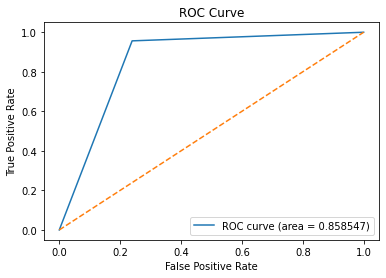

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label = 'ROC curve (area = %f)' % auc)
plt.plot([0, 1], [0, 1], linestyle = '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc = "lower right")
plt.show()

In [ ]:
!pip install --upgrade plotly==4.14.0
import plotly.express as plt2

def plot_cm(z, label_names):
    fig = plt2.imshow(z,
                     labels = dict(x = "Predicted", y = "Actual", color = "Productivity"),
                     x = label_names,
                     y = label_names,
                     width = 700)
    fig.update_layout(title = 'Confusion Matrix')
    fig.update_xaxes(side = "top")
    return fig

     |████████████████████████████████| 13.2MB 331kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
plot_cm(mat, ['NORMAL (Class 0)','PNEUMONIA (Class 1)']).show()

In [ ]:
f = open("XGBoost.pkl", "wb")
pickle.dump(model, f)
f.close()